## Julia Interfacing with R and Python

In [1]:
using PyCall
using DecisionTree
using DataFrames
using Statistics
ENV["COLUMNS"]=1000; # for dataframe column size

### py"" String Macro

- py"" executes Python commands with implicit conversion of python objects into Julia data type.

In [2]:
py"1+1" # returns julia numeric value by implicit conversion

2

### Defining a function in Python

In [3]:
py"""

import numpy as np

def mysin(x):
   return np.sin(x)
"""

In [4]:
py"mysin(10)" # calling python function

-0.5440211108893699

In [5]:
py"np.sin(10)"  # calling directly numpy sin function

-0.5440211108893699

In [6]:
pyimport("numpy").sin(10) # import numpy and call sin directly

-0.5440211108893699

### Plotting with Python

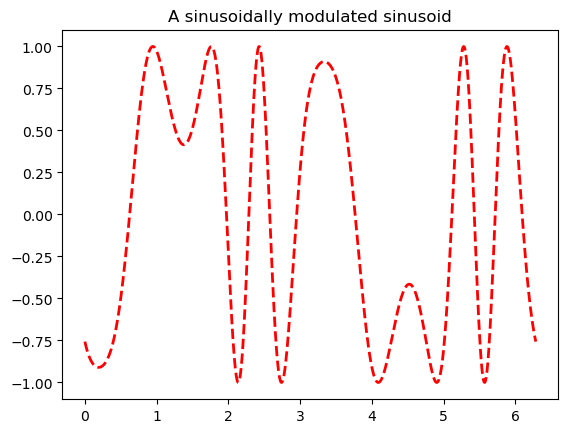

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/ppalmes/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


PyObject Text(0.5, 1.0, 'A sinusoidally modulated sinusoid')

In [7]:
using PyPlot
x = range(0; stop=2*pi, length=1000); y = sin.(3 * x + 4 * cos.(2 * x));
plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

###   Scikitlearn classifiers using Julia bindings of Python (PyCall.jl)

Let's load the `car` dataset for this example.

In [8]:
using VegaDatasets
cars=dataset("cars") |> DataFrame;
first(cars,5)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA


In [9]:
cars = cars[completecases(cars),:]; # remove rows with missing values

In [10]:
ENS = pyimport("sklearn.ensemble")
learner=ENS.RandomForestClassifier()

x=cars[:,[2,4,5,6,7]] |> Array
y=cars[:,:Cylinders] .|> string

model=learner.fit(x, y)
yhat = model.predict(x)
accuracy = sum(yhat .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 1.0


In [11]:
using ScikitLearn.CrossValidation: cross_val_score

KNN = pyimport("sklearn.neighbors")
modelKNN = KNN.KNeighborsClassifier(3)

cross_val_score(modelKNN, x, y; cv=10)  # 5-fold

┌ Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
└ @ ScikitLearn.Skcore /Users/ppalmes/.julia/packages/ScikitLearn/ssekP/src/cross_validation.jl:144
/Users/ppalmes/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `_pairwise` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/Users/ppalmes/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `_pairwise` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/Users/ppalmes/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `_pairwise` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/Users/ppalme

10-element Vector{Float64}:
 0.8095238095238095
 0.9523809523809523
 0.9047619047619048
 0.8974358974358975
 0.9736842105263158
 1.0
 0.8947368421052632
 0.9736842105263158
 0.868421052631579
 0.9459459459459459

In [12]:
using PyCall
const EN=pyimport("sklearn.ensemble")
const LM=pyimport("sklearn.linear_model")
const DA=pyimport("sklearn.discriminant_analysis")
const NN=pyimport("sklearn.neighbors")
const SVM=pyimport("sklearn.svm")
const TREE=pyimport("sklearn.tree")
const ANN=pyimport("sklearn.neural_network")
const GP=pyimport("sklearn.gaussian_process")
const KR=pyimport("sklearn.kernel_ridge")
const NB=pyimport("sklearn.naive_bayes")
const ISO=pyimport("sklearn.isotonic")

PyObject <module 'sklearn.isotonic' from '/Users/ppalmes/.local/lib/python3.9/site-packages/sklearn/isotonic.py'>

In [13]:
learners = Dict(
  "AdaBoostClassifier" => ENS.AdaBoostClassifier,
  "BaggingClassifier" => ENS.BaggingClassifier,
  "ExtraTreesClassifier" => ENS.ExtraTreesClassifier,
  "VotingClassifier" => ENS.VotingClassifier,
  "GradientBoostingClassifier" => ENS.GradientBoostingClassifier,
  "RandomForestClassifier" => ENS.RandomForestClassifier,
  "LDA" => DA.LinearDiscriminantAnalysis,
  "QDA" => DA.QuadraticDiscriminantAnalysis,
  "LogisticRegression" => LM.LogisticRegression,
  "PassiveAggressiveClassifier" => LM.PassiveAggressiveClassifier,
  "RidgeClassifier" => LM.RidgeClassifier,
  "RidgeClassifierCV" => LM.RidgeClassifierCV,
  "SGDClassifier" => LM.SGDClassifier,
  "KNeighborsClassifier" => NN.KNeighborsClassifier,
  "RadiusNeighborsClassifier" => NN.RadiusNeighborsClassifier,
  "NearestCentroid" => NN.NearestCentroid,
  "SVC" => SVM.SVC,
  "LinearSVC" => SVM.LinearSVC,
  "NuSVC" => SVM.NuSVC,
  "MLPClassifier" => ANN.MLPClassifier,
  "GaussianProcessClassifier" => GP.GaussianProcessClassifier,
  "DecisionTreeClassifier" => TREE.DecisionTreeClassifier,
  "GaussianNB" => NB.GaussianNB,
  "MultinomialNB" => NB.MultinomialNB,
  "ComplementNB" => NB.ComplementNB,
  "BernoulliNB" => NB.BernoulliNB
);

In [14]:
function sktrain(learner,x,y)
    model = learner()
    xx = x |> Matrix
    yy = y |> Array
    model.fit(xx,yy)
    return model
end

sktrain (generic function with 1 method)

In [15]:
function skpredict(themodel,x)
    xx = x |> Matrix
    return themodel.predict(xx) |> collect
end

skpredict (generic function with 1 method)

In [16]:
using Random
rng = MersenneTwister(1234);
ndx = shuffle(rng, Vector(1:nrow(cars)));

In [17]:
xtrain=cars[ndx[1:100],[2,4,5,6,7]] |> Matrix
ytrain=cars[ndx[1:100],:Cylinders] .|> string;
xtest=cars[ndx[101:end],[2,4,5,6,7]] |> Matrix
ytest=cars[ndx[101:end],:Cylinders] .|> string;

### Try ExtraTrees Classifier

In [18]:
modelLR = sktrain(learners["ExtraTreesClassifier"],xtrain,ytrain)
yhat = skpredict(modelLR,xtest);
acc=sum(yhat .== ytest) / length(yhat)

0.9657534246575342

### Try AdaBoost Classifier

In [19]:
modelADA = sktrain(learners["AdaBoostClassifier"],x,y)
res = skpredict(modelADA,x);
acc=sum(res .== y) / length(y)

0.7040816326530612

### Try RandomForest Classifier

In [20]:
modelRF = sktrain(learners["RandomForestClassifier"],x,y)
res = skpredict(modelRF,x);
acc=sum(res .== y) / length(y)

1.0

In [22]:
cross_val_score(modelLR, x, y; cv=10) |> mean  # 5-fold

┌ Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
└ @ ScikitLearn.Skcore /Users/ppalmes/.julia/packages/ScikitLearn/ssekP/src/cross_validation.jl:144


0.964407380196854